In [61]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline 
# Za prikaz grafov neposredno v Jupyter Notebook

In [62]:
"""Ta modul vsebuje implementacijo razreda (5,0)-Nanotubičnega fulerena."""

import math
from typing import Union

import matplotlib.pyplot as plt
import networkx as nx


class ntf:
    """
    Razred za predstavitev (5,0)-Nanotubičnega fulerena z več orbitalami.

    Molekularna struktura: C_{10k}, kjer je k = 2, 3, 4, ...

    Atributi:
    --------
        k (int): Red molekule, ki določa število orbital.
        zigzag (bool): Določa, ali se povezave dekagonov izmenjujejo med sodimi ali lihimi vozlišči.
        G (networkx.Graph): Grafična predstavitev molekule.
        pos (dict): Pozicije vozlišč za vizualizacijo.

    Metode:
    --------
        plot_graph(): Nariše grafično predstavitev molekule.
        convert_graph(): Pretvori graf NetworkX v določeno predstavitev.
    """

    def __init__(self, k: int, zigzag: bool = True) -> None:
        self.k: int = k
        self.zigzag: bool = zigzag
        self.G: nx.Graph = None
        self.pos: dict = None
        self.create_graph()

    @staticmethod
    def validate_order_class(k: int) -> None:
        """
        Preveri veljavnost reda molekule.

        Parametri:
        --------
            k (int): Red molekule, ki določa število orbital.

        Izjeme:
        --------
            ValueError: Če je k manjše od 2.
        """
        if k < 2:
            raise ValueError("Red molekule (k) mora biti >= 2.")

    def create_graph(self) -> None:
        """Ustvari nx-graf za (5,0)-Nanotubični fuleren."""
        self.G = nx.Graph()
        self.pos = {}

        # Število dekagonalnih orbital (brez pentagonalnih plasti)
        n: int = self.k - 1

        # Dodaj centralni pentagon (0-ta orbita)
        for i in range(5):
            angle = i * 2 * math.pi / 5 + math.pi / 4
            self.pos[i] = (
                math.cos(angle) * 0.8,
                math.sin(angle) * 0.8,
            )
            self.G.add_edge(i, (i + 1) % 5)

        # Dodaj dekagonalne orbite (10-kotne plasti)
        for orbit in range(1, n + 1):
            offset_x, offset_y = orbit + 0.5, orbit + 0.5

            # Dodaj vozlišča in povezave za vsako orbitalo
            for i in range(10):
                angle = i * 2 * math.pi / 10
                pos_idx = 5 + (orbit - 1) * 10 + i 
                self.pos[pos_idx] = (
                    math.cos(angle) * offset_x, # x koordinata
                    math.sin(angle) * offset_y, # y koordinata
                )

                # Dodaj povezave znotraj iste orbite (formiranje dekagonov)
                self.G.add_edge(pos_idx, 5 + (orbit - 1) * 10 + (i + 1) % 10)

            # Poveži orbitale
            if orbit == 1:
                for i in range(5):
                    even_idx = i * 2 % 10  # Povezave na sode indekse
                    self.G.add_edge(i, 6 + even_idx)
            # Povezave med dekagoni
            else:
                for i in range(10):
                    # Uporabi zig-zag vzorec med dekagoni 
                    if self.zigzag:
                        if orbit % 2 == 0 and i % 2 == 0:
                            self.G.add_edge(
                                5 + (orbit - 2) * 10 + i,
                                5 + (orbit - 1) * 10 + i,
                            )
                        elif orbit % 2 != 0 and i % 2 != 0:
                            self.G.add_edge(
                                5 + (orbit - 2) * 10 + i,
                                5 + (orbit - 1) * 10 + i,
                            )
                    # Alternirajoče povezave med dekagoni
                    else:
                        if i % 2 == 0:
                            self.G.add_edge(
                                5 + (orbit - 2) * 10 + i,
                                5 + (orbit - 1) * 10 + i,
                            )

        # Dodaj zadnjo pentagonalno orbito 
        for i in range(5):
            angle = i * 2 * math.pi / 5
            pos_idx = 15 + (n - 1) * 10 + i
            self.pos[pos_idx] = (
                math.cos(angle) * (n + 1) * 1.3,   # x koordinata
                math.sin(angle) * (n + 1) * 1.3,   # y koordinata
            )

            # Poveži končni pentagon z zadnjo dekagonalno orbitalo. 
            if (n + 1) % 2 == 0:
                decagon_idx = 5 + (n - 1) * 10 + (i * 2) % 10
            else:
                decagon_idx = 5 + (n - 1) * 10 + (i * 2 + 1) % 10

            # Dodaj povezave med pentagonom in dekagonom 
            self.G.add_edge(pos_idx, decagon_idx)
            # Dodaj povezave v pentagonu samem 
            self.G.add_edge(pos_idx, 15 + (n - 1) * 10 + (i + 1) % 5)

    def convert_graph(
        self, format: str = "adjacency_list"
    ) -> Union[dict[int, list[int]], list[list[int]], list[tuple]]:
        
        """
        pretvori NetworkX graf.

        Parameters:
        --------
            format (str): Želen format za graf. Možnosti:
            - `adjacency_list`
            - `adjacency_matrix`
            - `edge_list`

        Vrne:
        --------
            Prikaz grafa v želenem formatu.

        Raises:
        --------
            ValueError: If the specified format is not supported.
        """
        if format == "adjacency_list":
            return {node: list(self.G.neighbors(node)) for node in self.G.nodes()}
        elif format == "adjacency_matrix":
            return nx.to_numpy_array(self.G).tolist()
        elif format == "edge_list":
            return list(self.G.edges())
        else:
            raise ValueError(
                f"Unsupported format: {format}, choose from 'adjacency_list', 'adjacency_matrix', 'edge_list'."
            )

    def plot_graph(
        self,
        node_size: int = 25,
        font_size: int = 0,
        node_color: str = "black",
        edge_color: str = "black",
    ) -> None:
        
        """
        Nariše grafični prikaz (5,0)-Nanotubičnega fulerena.

        Parametri:
        --------
            node_size (int): Velikost vozlišč na grafu.
            font_size (int): Velikost pisave za oznake vozlišč.
            node_color (str ali seznam): Barva vozlišč.
            edge_color (str ali seznam): Barva povezav.
        """

        plt.figure(figsize=(8, 8))
        nx.draw_networkx(
            self.G,
            self.pos,
            with_labels=True,
            node_size=node_size,
            font_size=font_size,
            node_color=node_color,
            edge_color=edge_color,
        )
        plt.title(r"(5,0)-Nanotubical Fullerene: $C_{(10 \cdot %d)}$" % self.k)
        plt.show()  

    def get_orbit(self, v):
        """Vrne orbito v kateri je vozlišče v."""
        if v < 5:  # Prvi petkotnik
            return 0
        elif v >= 15 + (self.k - 2) * 10:  # Zadnji petkotnik
            return self.k
        else:
            return (v - 5) // 10 + 1

    def compute_L_vector(self, v):
        """Izračuna distančni vektor L(v) z razbitjem grafa na orbiti v."""
    
        orbit_v = self.get_orbit(v)  # Dobimo orbito od v
    
        # Naredimo podgraf kjer imamo samo vozlišča do v
        sub_nodes = {u for u in self.G.nodes if self.get_orbit(u) <= orbit_v}
        subgraph = self.G.subgraph(sub_nodes)
    
        # naredimo BFS da dobimo najkrajšo pot do vozlišč
        distances = nx.single_source_shortest_path_length(subgraph, v)
        max_dist = max(distances.values())
    
        # Odstranimo vozlišča v naši orbiti
        filtered_distances = {u: d for u, d in distances.items() if self.get_orbit(u) != orbit_v}
    
        # Izračunamo L(v)
        L_v = [0] * (max_dist + 1)
        for dist in filtered_distances.values():
            L_v[dist] += 1
    
        return L_v

    def compute_D_vector(self, v):
        """Izračuna distančni vektor D(v) glede na to v kateri orbiti je v."""
        orbit_v = self.get_orbit(v)

        if orbit_v in {0, self.k}:  # v je v prvi ali zadnji orbiti
            return [1, 2, 2]
        else:
            return [1, 2, 2, 2, 2, 1]
        
    def find_symmetric_vertex(self, v):
        """najdemo simetrično vozlišče od v (na drugi strani grafa)."""

        j = self.get_orbit(v)  # Dobimo orbito od v
        j_symmetric = self.k - j  # Dobimo orbito simetrično od v
        if j == 0:
            return 15 + (self.k - 2) * 10  # zagotovimo da se prvi petkotnik povezuje z zadnjim
        if j == self.k:
            return 0  # zagotovimo da se zadnji petkotnik povezuje s prvim

        # Nakdemo relativo pozicijo vozlišča v njegovi orbiti
        relative_index = (v - 5) % 10

        #grozna koda s tole +1 na koncu
        symmetric_vertex = 5 + (j_symmetric - 1) * 10 + relative_index + 1

        return symmetric_vertex


    def compute_DV_vector(self, v):
        """Izračuna vektor distanc DV(v) z uporabo L(v), D(v) in R(v)."""
        
        L_v = self.compute_L_vector(v)  # Izračun L(v)
        D_v = self.compute_D_vector(v)  # Izračun D(v)
        
        # Izračun R(v) na podlagi simetričnosti
        symmetric_v = self.find_symmetric_vertex(v)
        R_v = self.compute_L_vector(symmetric_v)
    
        max_length = max(len(L_v), len(D_v), len(R_v))
        
        # Ničelni vektorji
        L_v += [0] * (max_length - len(L_v))
        D_v += [0] * (max_length - len(D_v))
        R_v += [0] * (max_length - len(R_v))
    
        # Izračun DV(v)
        DV_v = [L_v[i] + D_v[i] + R_v[i] for i in range(max_length)]
    
        return DV_v
    

    
    def compute_eccentric_connectivity(self):
        """Izračuna indeks eccentrične povezanosti grafa."""
        
        eccentricity_dict = nx.eccentricity(self.G)  # Dobimo eccentričnost za vsa vozlišča
        eccentric_connectivity = sum(
            self.G.degree[v] * eccentricity_dict[v] for v in self.G.nodes
        )
        
        return eccentric_connectivity
    

    def compute_eccentric_adjacency_index(self) -> float:
        """
        Izračuna ekscentrični adjoinostni indeks xi_0ad(G).
    
        Vrne:
        --------
            float: Vrednost xi_ad(G).
        """
        xi_ad = 0.0
        eccentricity = nx.eccentricity(self.G)  # eccentričnost posameznih vozlišč
    
        for v in self.G.nodes:
            sum_deg_neighbors = sum(self.G.degree(n) for n in self.G.neighbors(v))  # SG(v)
            ecc_v = eccentricity[v] if eccentricity[v] > 0 else 1  # Da se izognemo deljenju z 0
            xi_ad += sum_deg_neighbors / ecc_v
    
        return xi_ad
    
    def compute_first_eccentric_connectivity_index(self) -> float:
        """
        Izračuna prvi ekscentrični povezovalni indeks xi_1(G).

        Vrne:
        --------
            float: Vrednost xi_1(G).
        """
        xi_1 = 0.0
        eccentricity = nx.eccentricity(self.G)  # eccentričnost posameznih vozlišč

        for u, v in self.G.edges:
            xi_1 += eccentricity[u] + eccentricity[v]  # vsota vseh

        return xi_1
    
    def compute_second_eccentric_connectivity_index(self) -> float:
        """
        Izračuna drugi ekscentrični povezovalni indeks xi_2(G).

        Vrne:
        --------
            float: Vrednost xi_1(G).
        """
        xi_2 = 0.0
        eccentricity = nx.eccentricity(self.G)  # eccentričnost posameznih vozlišč

        for u, v in self.G.edges:
            xi_2 += eccentricity[u] * eccentricity[v]  # vsota vseh

        return xi_2

    def compute_generalized_wiener_index(self, lambda_value: float) -> float:
        """
        Izračuna posplošeni Wienerjev indeks W^λ(G).

        Parametri:
        --------
            lambda_value (float): Eksponent λ za uteži razdalj.

        Vrne:
        --------
            float: Vrednost W^λ(G).
        """
        w_lambda = 0.0
        shortest_paths = dict(nx.all_pairs_shortest_path_length(self.G))

        for u in self.G.nodes:
            for v in self.G.nodes:
                if u < v:  # Zagotovimo, da vsako par (u,v) štejemo le enkrat
                    dist = shortest_paths[u][v]
                    w_lambda += dist ** lambda_value
        
        return w_lambda
    
    def compute_harary_index(self) -> float:
        """
        Izračuna Hararyjev indeks H(G).

        Vrne:
        --------
            float: Vrednost H(G).
        """
        h_index = 0.0
        shortest_paths = dict(nx.all_pairs_shortest_path_length(self.G))

        for u in self.G.nodes:
            for v in self.G.nodes:
                if u < v:  # Zagotovimo, da vsako par (u,v) štejemo le enkrat
                    dist = shortest_paths[u][v]
                    if dist > 0:
                        h_index += 1 / dist
        
        return h_index
    
    def compute_balaban_index(self) -> float:
        """
        Izračuna Balaban indeks J(G).

        Vrne:
        --------
            float: Vrednost J(G).
        """
        m = self.G.number_of_edges()  # Število povezav
        n = self.G.number_of_nodes()  # Število vozlišč
        shortest_paths = dict(nx.all_pairs_shortest_path_length(self.G))

        # Izračunaj w(u) za vsako vozlišče u
        w = {u: sum(shortest_paths[u].values()) for u in self.G.nodes}

        # Izračunaj Sum-Balaban indeks
        J = 0.0
        for u, v in self.G.edges():
            J += 1 / math.sqrt(w[u] * w[v])
        
        return (m / (m - n + 2)) * J if m - n + 2 != 0 else 0  # Izogibanje deljenju z 0
    

    def compute_sum_balaban_index(self) -> float:
        """
        Izračuna Sum-Balaban indeks SJ(G).

        Vrne:
        --------
            float: Vrednost SJ(G).
        """
        m = self.G.number_of_edges()  # Število povezav
        n = self.G.number_of_nodes()  # Število vozlišč
        shortest_paths = dict(nx.all_pairs_shortest_path_length(self.G))

        # Izračunaj w(u) za vsako vozlišče u
        w = {u: sum(shortest_paths[u].values()) for u in self.G.nodes}

        # Izračunaj Sum-Balaban indeks
        SJ = 0.0
        for u, v in self.G.edges():
            SJ += 1 / math.sqrt(w[u] + w[v])
        
        return (m / (m - n + 2)) * SJ if m - n + 2 != 0 else 0  # Izogibanje deljenju z 0
    

    def compute_generalized_wiener_polarity_index(self, k: int) -> int:
        """
        Izračuna Generalized Wiener Polarity Index W_k(G), ki šteje pare vozlišč z razdaljo k.
    
        Parametri:
        --------
            k (int): Razdalja med vozlišči, ki jo štejemo.
    
        Vrne:
        --------
            int: Vrednost W_k(G).
        """
        W_k = 0
        shortest_paths = dict(nx.all_pairs_shortest_path_length(self.G))
    
        for u in self.G.nodes:
            for v in self.G.nodes:
                if u < v and shortest_paths[u][v] == k:
                    W_k += 1
    
        return W_k
    


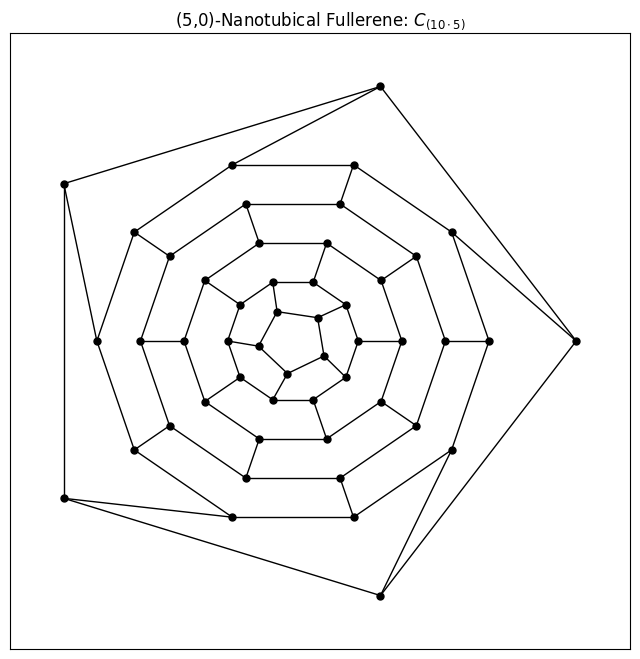

In [63]:
# Ustvari (5,0)-Nanotubical Fullerene graf za k=100 z zigzag povezavami
G = ntf(k=5, zigzag=True)

# Vizualiziraj graf
G.plot_graph(node_size=25, font_size=0, node_color="black", edge_color="black")

# Pretvori graf v različne formate
edge_list = G.convert_graph(format="edge_list")
adjacency_list = G.convert_graph(format="adjacency_list")
adjacency_matrix = G.convert_graph(format="adjacency_matrix")


In [64]:
# Naredimo graf
graf_primer = ntf(k=10)

# Izberemo poljubno vozlišče v grafu
v = 36

# Izračun L(v)
L_v = graf_primer.compute_L_vector(v)

# L(v)
print(f"L({v}) = {L_v}")

DV_v = graf_primer.compute_DV_vector(v)
print(f"DV({v}) = {DV_v}")




L(36) = [0, 0, 2, 3, 5, 6, 7, 6, 6]
DV(36) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 6, 5, 5]


In [65]:
k = 8
test_za_eccentrično_povezanost = ntf(k)  # naredimo nanotub za k
indeks_eccentrične_povezanosti = test_za_eccentrično_povezanost.compute_eccentric_connectivity()
print(f"Indeks eccentrične povezanosti: {indeks_eccentrične_povezanosti}")
pricakovan_rezultat_za_eccentrično_povezanost = 45 * (k**2) - 15 * k
print(pricakovan_rezultat_za_eccentrično_povezanost)

Indeks eccentrične povezanosti: 2760
2760


In [66]:
# Naredimo nanotube za testiranje kode
velikost_nanotuba = 12

nanotube = ntf(k=velikost_nanotuba, zigzag=True)

# Testiramo različne lambe
lambda_values = [0.5, 1, 2, -1]
#urejamo k za Wiener index
k=22

for lam in lambda_values:
    w_lambda = nanotube.compute_generalized_wiener_index(lam)
    print(f"W^{lam}(G) = {w_lambda}")

# Izračunaj Hararyjev indeks
harary_index = nanotube.compute_harary_index()

# Izpiši rezultat
print(f"Hararyjev indeks grafa: {harary_index}")

#izračuna sum_balaban_index
sum_balaban_index = nanotube.compute_sum_balaban_index()
print(f"Sum-Balaban indeks grafa: {sum_balaban_index}")


generalized_wiener_polarity_index = nanotube.compute_generalized_wiener_polarity_index(k)
print(f"Generalized Wiener Polarity Index W_{k}(G): {generalized_wiener_polarity_index}")

#tole spreminjas glede na to kaj more bit (kaj je napisan v clanku)
pricakovan_rezultat_za_wiener_polarity_index = 50 * velikost_nanotuba - 25 * k
print(pricakovan_rezultat_za_wiener_polarity_index)



W^0.5(G) = 20013.522201008942
W^1(G) = 61630.0
W^2(G) = 719470.0
W^-1(G) = 1320.9995098267182
Hararyjev indeks grafa: 1320.9995098267182
Sum-Balaban indeks grafa: 11.68200653307376
Generalized Wiener Polarity Index W_22(G): 50
50


In [67]:
velikost_nanotuba1 = 5
nanotube = ntf(k=velikost_nanotuba1, zigzag=True)

eccentric_adjacency_index = nanotube.compute_eccentric_adjacency_index()
print(f"Eccentric Adjacency Index ξ^ad(G): {eccentric_adjacency_index}")
spodnja_meja = 90 * np.log(2)
zgodnja_meja = 90 * (np.log(2 * velikost_nanotuba - 1) - np.log(velikost_nanotuba - 1))
print(spodnja_meja)
print(zgodnja_meja)

Eccentric Adjacency Index ξ^ad(G): 58.214285714285694
62.383246250395075
66.3839048817701


In [68]:
velikost_nanotuba2 = 8
nanotube = ntf(k=velikost_nanotuba2, zigzag=True)

first_eccentric_connectivity_index = nanotube.compute_first_eccentric_connectivity_index()
second_eccentric_connectivity_index = nanotube.compute_second_eccentric_connectivity_index()
print(f"first_eccentric_connectivity_index: {first_eccentric_connectivity_index}")
print(f"second_eccentric_connectivity_index: {second_eccentric_connectivity_index}")
pricakovana_vrednost_1 = 45 * (velikost_nanotuba2 ** 2) - 15 * velikost_nanotuba2
pricakovana_vrednost_2_soda = 35 * (k ** 3) - (45 / 2) * (k ** 2) + 5 * k
pricakovana_vrednost_2_liha = 35 * (k ** 3) - (45 / 2) * (k ** 2) + 15 / 2  - 5 * k
print(pricakovana_vrednost_1)
print(pricakovana_vrednost_2_soda)
print(pricakovana_vrednost_2_liha)

first_eccentric_connectivity_index: 2760.0
second_eccentric_connectivity_index: 16450.0
2760
361900.0
361687.5


Izrek 5

In [69]:
# (a) Ekscentrični povezovalni indeks ξc(G)
def check_xi_c(k):
    nanotube = ntf(k)
    ξc_actual = nanotube.compute_eccentric_connectivity()
    ξc_expected = 45 * (k**2) - 15 * k
    print(f"(a) ξc(G) = {ξc_actual}, Pričakovana vrednost: {ξc_expected}")
    print(f"(a) Je pravilno? {'Da' if ξc_actual == ξc_expected else 'Ne'}")

# (b) Ekscentrični sosednji indeks ξad(G)
def check_xi_ad(k):
    nanotube = ntf(k)
    ξad_actual = nanotube.compute_eccentric_adjacency_index()
    spodnja_meja = 90 * np.log(2)
    zgornja_meja = 90 * (np.log(2 * k - 1) - np.log(k - 1))
    print(f"(b) ξad(G) = {ξad_actual}, Interval: ({spodnja_meja}, {zgornja_meja})")
    print(f"(b) Je ξad v pričakovanem intervalu? {'Da' if spodnja_meja <= ξad_actual <= zgornja_meja else 'Ne'}")

# (c) Prvi ekscentrični povezovalni indeks ξ1(G)
def check_xi_1(k):
    nanotube = ntf(k)
    ξ1_actual = nanotube.compute_first_eccentric_connectivity_index()
    ξ1_expected_star = 45 * (k**2) - 15 * k
    ξ1_expected_nov = 1/6 * k * (2 * k - 1) * (7 * k - 1)
    print(f"(c) ξ1(G) = {ξ1_actual}, Pričakovana vrednost: {ξ1_expected_star}")
    print(f"(c) Je pravilno? {'Da' if ξ1_actual == ξ1_expected_star else 'Ne'}")
    print(f"(c) ξ1(G) = {ξ1_actual}, Pričakovana vrednost: {ξ1_expected_nov}")
    print(f"(c) Je pravilno? {'Da' if ξ1_actual == ξ1_expected_nov else 'Ne'}")

# (d) Drugi ekscentrični povezovalni indeks ξ2(G)
def check_xi_2(k):
    nanotube = ntf(k)
    ξ2_actual = nanotube.compute_second_eccentric_connectivity_index()
    if k % 2 == 0:
        ξ2_expected = 35 * (k**3) - (45 / 2) * (k**2) + (- 5 * k + 10)
    else:
        ξ2_expected = 35 * (k**3) - (45 / 2) * (k**2) + (15 / 2 - 5 * k)
    print(f"(d) ξ2(G) = {ξ2_actual}, Pričakovana vrednost: {ξ2_expected}")
    print(f"(d) Je pravilno? {'Da' if ξ2_actual == ξ2_expected else 'Ne'}")

# Nastavi vrednost k
k_test = 50


# Zaženi preverjanja
check_xi_c(k_test)
check_xi_ad(k_test)
check_xi_1(k_test)
check_xi_2(k_test)

(a) ξc(G) = 111750, Pričakovana vrednost: 111750
(a) Je pravilno? Da
(b) ξad(G) = 62.835496137917545, Interval: (62.383246250395075, 63.2969596821567)
(b) Je ξad v pričakovanem intervalu? Da
(c) ξ1(G) = 111750.0, Pričakovana vrednost: 111750
(c) Je pravilno? Da
(c) ξ1(G) = 111750.0, Pričakovana vrednost: 287924.99999999994
(c) Je pravilno? Ne
(d) ξ2(G) = 4318510.0, Pričakovana vrednost: 4318510.0
(d) Je pravilno? Da


Ugotovitve:\
Za k < 6: vse false \
k = 6: b true \
k = 7: b true \
k = 8: a,b,c true \
k = 9: vse true \
k = 10: a,b,c true \
k = 11: vse true \
k = 12: a,b,c, true \
če k lih vse drži, če k sod pa d ne drži. \
-> če spremenimo delto, deluje \
sprememba pri (c) ni pravilna


nova koda

In [70]:
# (a) Formula za ξc(C10k)
def xi_c_formula(k):
    return 45 * k**2 - 15 * k

# (b) Formula za omejitve ξad(C10k)
def xi_ad_formula(k):
    lower_bound = 90 * np.log(2)
    upper_bound = 90 * (np.log(2 * k - 1) - np.log(k - 1))
    return lower_bound, upper_bound

# (c) Formula za ξ1(C10k)
def xi_1_formula(k):
    return (1/6) * k * (2 * k - 1) * (7 * k - 1)

# (d) Formula za ξ2(C10k)
def xi_2_formula(k):
    delta = 5 * k if k % 2 == 0 else (15 / 2 - 5 * k)
    return 35 * k**3 - (45/2) * k**2 + delta

# Funkcija za izračun ekscentričnih indeksov iz dejanskega grafa
def eccentricity_index_1(graph_obj):
    G = graph_obj.G
    ecc = nx.eccentricity(G)
    return sum(ecc[u]**2 for u in G.nodes())

def eccentricity_index_2(graph_obj):
    G = graph_obj.G
    ecc = nx.eccentricity(G)
    return sum(ecc[u] * ecc[v] for u, v in G.edges())

# Testiranje za različne vrednosti k (k≥8)
k_values = range(8, 14)  # Test za k = 8 do k = 13
results = []

for k in k_values:
    nanotube = ntf(k=k)  # Ustvarimo graf

    # Dejanski izračuni iz grafa
    xi1_actual = eccentricity_index_1(nanotube)
    xi2_actual = eccentricity_index_2(nanotube)

    # Izračuni po formulah iz Theorema 5
    xi_c = xi_c_formula(k)
    xi_ad_lower, xi_ad_upper = xi_ad_formula(k)
    xi1_formula = xi_1_formula(k)
    xi2_formula = xi_2_formula(k)

    # Primerjava rezultatov
    match_a = np.isclose(xi_c, xi1_actual)  # (a)
    match_b = xi_ad_lower <= xi1_actual <= xi_ad_upper  # (b)
    match_c = np.isclose(xi1_formula, xi1_actual)  # (c)
    match_d = np.isclose(xi2_formula, xi2_actual)  # (d)

    results.append((k, xi1_actual, xi1_formula, match_c, xi2_actual, xi2_formula, match_d, xi_c, match_a, xi_ad_lower, xi_ad_upper, match_b))

# Pretvorimo v pandas DataFrame in izpišemo tabelo
df = pd.DataFrame(results, columns=['k', 'ξ1_actual', 'ξ1_formula', 'Match_c', 'ξ2_actual', 'ξ2_formula', 'Match_d', 'ξc_formula', 'Match_a', 'ξad_lower', 'ξad_upper', 'Match_b'])


# Prikaz tabele
print(df.to_string(index=False))

 k  ξ1_actual  ξ1_formula  Match_c  ξ2_actual  ξ2_formula  Match_d  ξc_formula  Match_a  ξad_lower  ξad_upper  Match_b
 8      11000      1100.0    False      16450     16520.0    False        2760    False  62.383246  68.592605    False
 9      15810      1581.0    False      23655     23655.0     True        3510    False  62.383246  67.839462    False
10      21850      2185.0    False      32710     32800.0    False        4350    False  62.383246  67.249296    False
11      29260      2926.0    False      43815     43815.0     True        5280    False  62.383246  66.774361    False
12      38180      3818.0    False      57190     57300.0    False        6300    False  62.383246  66.383905    False
13      48750      4875.0    False      73035     73035.0     True        7410    False  62.383246  66.057226    False


In [71]:
k_test = 8
nanotube = ntf(k=k_test)
ecc = nx.eccentricity(nanotube.G)
print(f"Ekscentričnosti za k={k_test}: {ecc}")

Ekscentričnosti za k=8: {0: 15, 1: 15, 2: 15, 3: 15, 4: 15, 5: 13, 6: 14, 7: 13, 8: 14, 9: 13, 10: 14, 11: 13, 12: 14, 13: 13, 14: 14, 15: 12, 16: 11, 17: 12, 18: 11, 19: 12, 20: 11, 21: 12, 22: 11, 23: 12, 24: 11, 25: 9, 26: 10, 27: 9, 28: 10, 29: 9, 30: 10, 31: 9, 32: 10, 33: 9, 34: 10, 35: 8, 36: 8, 37: 8, 38: 8, 39: 8, 40: 8, 41: 8, 42: 8, 43: 8, 44: 8, 45: 10, 46: 9, 47: 10, 48: 9, 49: 10, 50: 9, 51: 10, 52: 9, 53: 10, 54: 9, 55: 11, 56: 12, 57: 11, 58: 12, 59: 11, 60: 12, 61: 11, 62: 12, 63: 11, 64: 12, 65: 14, 66: 13, 67: 14, 68: 13, 69: 14, 70: 13, 71: 14, 72: 13, 73: 14, 74: 13, 75: 15, 76: 15, 77: 15, 78: 15, 79: 15}


In [72]:
import math
import networkx as nx

def compute_eccentricities(G: nx.Graph):
    """Izračuna ekscentričnosti vseh vozlišč v grafu."""
    return nx.eccentricity(G)

def compute_indices(G: nx.Graph, ecc):
    """Izračuna ekscentrične Zagrebove indekse."""
    xi_1 = sum(ecc[u]**2 for u in G.nodes)
    xi_2 = sum(ecc[u] * ecc[v] for u, v in G.edges)
    xi_c = sum(G.degree(v) * ecc[v] for v in G.nodes)

    # Mejne vrednosti za ξ_ad
    k = (len(G.nodes) - 5) // 10 + 1  # Izračun k iz števila vozlišč
    xi_ad_min = 90 * math.log(2)
    xi_ad_max = 90 * (math.log(2 * k - 1) - math.log(k - 1))

    return xi_1, xi_2, xi_c, xi_ad_min, xi_ad_max

# Nastavi svoj graf G
# G = tvoj_graf  (To kodo uporabi na svojem grafu)

# Izračun ekscentričnosti
eccentricities = compute_eccentricities(G)

# Izračun ekscentričnih Zagreb indeksov na tvojem grafu
xi_1_actual, xi_2_actual, xi_c_actual, xi_ad_min_actual, xi_ad_max_actual = compute_indices(G, eccentricities)

# Izračun teoretičnih vrednosti iz trditve
k = (len(G.nodes) - 5) // 10 + 1  # Izračun k glede na število vozlišč
xi_c_theoretical = 45 * k**2 - 15 * k
xi_ad_min_theoretical = 90 * math.log(2)
xi_ad_max_theoretical = 90 * (math.log(2 * k - 1) - math.log(k - 1))
xi_1_theoretical = (1/6) * k * (2 * k - 1) * (7 * k - 1)
delta = 5 * k if k % 2 == 0 else (15/2 - 5 * k)
xi_2_theoretical = 35 * k**3 - (45/2) * k**2 + delta

# Izpis rezultatov
print(f"(a) ξ_c: Dejansko = {xi_c_actual}, Teoretično = {xi_c_theoretical}, Razlika = {xi_c_actual - xi_c_theoretical}")
print(f"(b) ξ_ad min: Dejansko = {xi_ad_min_actual}, Teoretično = {xi_ad_min_theoretical}")
print(f"(b) ξ_ad max: Dejansko = {xi_ad_max_actual}, Teoretično = {xi_ad_max_theoretical}")
print(f"(c) ξ_1: Dejansko = {xi_1_actual}, Teoretično = {xi_1_theoretical}, Razlika = {xi_1_actual - xi_1_theoretical}")
print(f"(d) ξ_2: Dejansko = {xi_2_actual}, Teoretično = {xi_2_theoretical}, Razlika = {xi_2_actual - xi_2_theoretical}")

AttributeError: 'ntf' object has no attribute 'order'

In [73]:
results = []

k_values = range(8, 15)

# Glavna zanka za izračun
for k in k_values:
    print(f"Izračun za k = {k}...")
    
    molecule = ntf(k)
    G = molecule.G  

    # dejanske vrednosti
    ecc = nx.eccentricity(G)  # Ekscentričnost vseh vozlišč

    # (a) ξ_c dejansko
    xi_c_actual = sum(G.degree(v) * ecc[v] for v in G.nodes)

    # (b) ξ_ad min/max dejansko
    xi_ad_min_actual = 90 * math.log(2)
    xi_ad_max_actual = 90 * (math.log(2 * k - 1) - math.log(k - 1))

    # (c) ξ_1 dejansko
    xi_1_actual = sum(ecc[u]**2 for u in G.nodes)

    # (d) ξ_2 dejansko
    xi_2_actual = sum(ecc[u] * ecc[v] for u, v in G.edges)

    #teoretične vrednosti
    xi_c_theory = 45 * k**2 - 15 * k
    xi_ad_min_theory = 90 * math.log(2)
    xi_ad_max_theory = 90 * (math.log(2 * k - 1) - math.log(k - 1))
    xi_1_theory = (1/6) * k * (2 * k - 1) * (7 * k - 1)
    delta = 5 * k if k % 2 == 0 else (15/2 - 5 * k)
    xi_2_theory = 35 * k**3 - (45/2) * k**2 + delta

    results.append([k, 
                    xi_c_actual, xi_c_theory, xi_c_actual - xi_c_theory,
                    xi_ad_min_actual, xi_ad_min_theory, xi_ad_min_actual - xi_ad_min_theory,
                    xi_ad_max_actual, xi_ad_max_theory, xi_ad_max_actual - xi_ad_max_theory,
                    xi_1_actual, xi_1_theory, xi_1_actual - xi_1_theory,
                    xi_2_actual, xi_2_theory, xi_2_actual - xi_2_theory])

df = pd.DataFrame(results, columns=[
    "k",
    "(a) ξ_c dejansko", "(a) ξ_c teoretično", "(a) Razlika",
    "(b) ξ_ad min dejansko", "(b) ξ_ad min teoretično", "(b) Razlika",
    "(b) ξ_ad max dejansko", "(b) ξ_ad max teoretično", "(b) Razlika",
    "(c) ξ_1 dejansko", "(c) ξ_1 teoretično", "(c) Razlika",
    "(d) ξ_2 dejansko", "(d) ξ_2 teoretično", "(d) Razlika"
])

print(df)

Izračun za k = 8...
Izračun za k = 9...
Izračun za k = 10...
Izračun za k = 11...
Izračun za k = 12...
Izračun za k = 13...
Izračun za k = 14...
    k  (a) ξ_c dejansko  (a) ξ_c teoretično  (a) Razlika  \
0   8              2760                2760            0   
1   9              3510                3510            0   
2  10              4350                4350            0   
3  11              5280                5280            0   
4  12              6300                6300            0   
5  13              7410                7410            0   
6  14              8610                8610            0   

   (b) ξ_ad min dejansko  (b) ξ_ad min teoretično  (b) Razlika  \
0              62.383246                62.383246          0.0   
1              62.383246                62.383246          0.0   
2              62.383246                62.383246          0.0   
3              62.383246                62.383246          0.0   
4              62.383246                62.3

Izrek 7

In [ ]:
# Funkcija, ki izračuna Wt(C{10k})
def calculate_wiener_polarity_index(G, t):
    # Vse razdalje med vozlišči
    distances = dict(nx.all_pairs_shortest_path_length(G))
    count = 0

    # Štejemo pare vozlišč na razdalji t
    for u in G.nodes:
        for v in G.nodes:
            if u < v and distances[u][v] == t:
                count += 1

    return count

# Preverjanje trditev iz izreka
def verify_theorem(k, t):
    molecule = ntf(k)
    G = molecule.G

    calculated_Wt = calculate_wiener_polarity_index(G, t)

    # Pričakovana vrednost iz trditve
    if t == 1:
        expected = 15 * k
    elif t == 2:
        expected = 30 * k
    elif t == 3:
        expected = 45 * k - 30
    elif t == 4:
        expected = 60 * k - 80
    elif t == 5:
        expected = 70 * k - 135
    elif t == 6:
        expected = 70 * k - 180
    elif t == 7:
        expected = 65 * k - 220
    elif t == 8:
        expected = 60 * k - 230
    elif t == 9:
        expected = 55 * k - 250
    elif 10 <= t <= 2 * k - 1:
        expected = 50 * k - 25 * t
    else:
        expected = 0

    print(f"Za k={k} in t={t}:")
    print(f"Izračunan Wt: {calculated_Wt}, Pričakovan Wt: {expected}")
    print(f"Trditev drži? {calculated_Wt == expected}\n")

k_values = [1,2,3,4,5,6,7,8,9, 10, 11, 12, 13, 14]  
t_values = [1,2,3,4,5,6,7,8,9, 10, 15, 20, 25, 30, 36, 49] 
for k in k_values:
    for t in t_values:
        verify_theorem(k, t)

Za k=1 in t=1:
Izračunan Wt: 15, Pričakovan Wt: 15
Trditev drži? True

Za k=1 in t=2:
Izračunan Wt: 26, Pričakovan Wt: 30
Trditev drži? False

Za k=1 in t=3:
Izračunan Wt: 15, Pričakovan Wt: 15
Trditev drži? True

Za k=1 in t=4:
Izračunan Wt: 8, Pričakovan Wt: -20
Trditev drži? False

Za k=1 in t=5:
Izračunan Wt: 2, Pričakovan Wt: -65
Trditev drži? False

Za k=1 in t=6:
Izračunan Wt: 0, Pričakovan Wt: -110
Trditev drži? False

Za k=1 in t=7:
Izračunan Wt: 0, Pričakovan Wt: -155
Trditev drži? False

Za k=1 in t=8:
Izračunan Wt: 0, Pričakovan Wt: -170
Trditev drži? False

Za k=1 in t=9:
Izračunan Wt: 0, Pričakovan Wt: -195
Trditev drži? False

Za k=1 in t=10:
Izračunan Wt: 0, Pričakovan Wt: 0
Trditev drži? True

Za k=1 in t=15:
Izračunan Wt: 0, Pričakovan Wt: 0
Trditev drži? True

Za k=1 in t=20:
Izračunan Wt: 0, Pričakovan Wt: 0
Trditev drži? True

Za k=1 in t=25:
Izračunan Wt: 0, Pričakovan Wt: 0
Trditev drži? True

Za k=1 in t=30:
Izračunan Wt: 0, Pričakovan Wt: 0
Trditev drži? True



Preverimo, če velja koda za manjše k, pri vseh možnih t.

In [74]:
def preveri_vse_t_za_k(k):
    molecule = ntf(k)
    G = molecule.G
    diameter = 2 * k - 1

    vse_velja = True  # privzamemo, da velja za vse t

    for t in range(1, diameter + 1):
        calculated_Wt = calculate_wiener_polarity_index(G, t)

        # Pričakovana vrednost iz izreka
        if t == 1:
            expected = 15 * k
        elif t == 2:
            expected = 30 * k
        elif t == 3:
            expected = 45 * k - 30
        elif t == 4:
            expected = 60 * k - 80
        elif t == 5:
            expected = 70 * k - 135
        elif t == 6:
            expected = 70 * k - 180
        elif t == 7:
            expected = 65 * k - 220
        elif t == 8:
            expected = 60 * k - 230
        elif t == 9:
            expected = 55 * k - 250
        elif 10 <= t <= diameter:
            expected = 50 * k - 25 * t
        else:
            expected = 0

        if calculated_Wt != expected:
            print(f"Ne drži za k={k}, t={t}: Izračunano={calculated_Wt}, Pričakovano={expected}")
            vse_velja = False
        else:
            print(f"Drži za k={k}, t={t}")

    if vse_velja:
        print(f"Trditev popolnoma drži za k={k}.")
    else:
        print(f"Trditev ne drži za vse vrednosti t pri k={k}.")

# Zagon za k = 5
preveri_vse_t_za_k(9)


NameError: name 'calculate_wiener_polarity_index' is not defined

Ugotovitve:
- t je vedno navzgor omejen z 2k - 1, saj je to premer grafa - torej je logično, da je Wt = 0 za t >= 2k - 1
- trditev je pravilna za vse k>=2, če le upoštevamo, da je t omejen s premerom grafa

Izrek 7

In [ ]:
results = []

k_values = range(10, 100)  

for k in k_values:
    molecule = ntf(k)
    G = molecule.G  

    
    shortest_paths = dict(nx.all_pairs_shortest_path_length(G))  # Najkrajše razdalje med vozlišči
    node_pairs = [(u, v) for u in G.nodes for v in G.nodes if u < v]  # Vsi pari vozlišč brez ponavljanja

    # (a) Wienerjev indeks 
    W_actual = sum(shortest_paths[u][v] for u, v in node_pairs)

    # (b) Hiper-Wienerjev indeks 
    WW_actual = sum(shortest_paths[u][v] + shortest_paths[u][v]**2 for u, v in node_pairs)

    # (c) Recipročni komplementarni Wienerjev indeks 
    diameter = nx.diameter(G)
    RCW_actual = sum(1 / (diameter + 1 - shortest_paths[u][v]) for u, v in node_pairs)

    # teoretične vrednosti
    W_theory = (100/3) * k**3 + (1175/3) * k - 670
    WW_theory = (100/3) * k**4 + (100/3) * k**3 - (25/3) * k**2 + (10175/3) * k - 7200

    # Izračun R_k za RCW_theory
    R_k = (15 * k) / (2 * k - 1) + (30 * k) / (2 * k - 2) + (45 * k - 30) / (2 * k - 3) \
        + (60 * k - 80) / (2 * k - 4) + (70 * k - 135) / (2 * k - 5) \
        + (70 * k - 180) / (2 * k - 6) + (65 * k - 220 ) / (2 * k - 7) \
        + (60 * k - 230) / (2 * k - 8) + (55 * k - 250) / (2 * k - 9)
    RCW_theory = R_k + 50 * k - 250

    results.append([k, 
                    W_actual, W_theory, W_actual - W_theory,
                    WW_actual, WW_theory, WW_actual - WW_theory,
                    RCW_actual, RCW_theory, RCW_actual - RCW_theory])

df = pd.DataFrame(results, columns=[
    "k",
    "(a) W dejansko", "(a) W teoretično", "(a) Razlika",
    "(b) WW dejansko", "(b) WW teoretično", "(b) Razlika",
    "(c) RCW dejansko", "(c) RCW teoretično", "(c) Razlika"
])

print(df)

NameError: name 'ntf' is not defined

Napaka v formuli za Rk.

Izrek 8

In [15]:
def compute_L(k, alpha):
    """Izračuna spodnjo mejo L iz izreka."""
     

    if alpha < 0 and alpha not in [-1, -2]:  
        L = (50 * k / (alpha + 1)) * ((2*k)**(alpha + 1) - (10)**(alpha + 1)) - \
            (25 / (alpha + 2)) * ((2*k-1)**(alpha + 2) - (9)**(alpha + 2))

    elif 0 < alpha < 1:  
        L = (50 * k / (alpha + 1)) * ((2*k-1)**(alpha + 1) - (9)**(alpha + 1)) - \
            (25 / (alpha + 2)) * ((2*k-1)**(alpha + 2) - (9)**(alpha + 2))

    elif alpha > 1:  
        L = (50 * k / (alpha + 1)) * ((2*k-1)**(alpha + 1) - (9)**(alpha + 1)) - \
            (25 / (alpha + 2)) * ((2*k)**(alpha + 2) - (10)**(alpha + 2))

    elif alpha == -1:  
        L = 50 * k * (np.log(2*k) - np.log(10)) 

    elif alpha == -2:  
        L = -50 * k * ((2*k)**-1 - (10)**-1) - 25 * (np.log(2*k-1) - np.log(9))

    else:
        raise ValueError("Neveljavna vrednost alpha.")

    return L

def compute_P(k, alpha):
    """Izračuna zgornjo mejo P iz izreka."""
    

    if alpha < 0 and alpha not in [-1, -2]:  
        P = (50 * k / (alpha + 1)) * ((2*k-1)**(alpha + 1) - (9)**(alpha + 1)) - \
            (25 / (alpha + 2)) * ((2*k)**(alpha + 2) - (10)**(alpha + 2))

    elif 0 < alpha < 1:  
        P = (50 * k / (alpha + 1)) * ((2*k)**(alpha + 1) - (10)**(alpha + 1)) - \
            (25 / (alpha + 2)) * ((2*k)**(alpha + 2) - (10)**(alpha + 2))

    elif alpha > 1:  
        P = (50 * k / (alpha + 1)) * ((2*k)**(alpha + 1) - (10)**(alpha + 1)) - \
            (25 / (alpha + 2)) * ((2*k-1)**(alpha + 2) - (9)**(alpha + 2))

    elif alpha == -1:  
        P = 50 * k * (np.log(2*k-1) - np.log(9)) - 50 * k + 250

    elif alpha == -2:  
        P = -50 * k * ((2*k-1)**-1 - (9)**-1) - 25 * (np.log(2*k) - np.log(10))

    else:
        raise ValueError("Neveljavna vrednost alpha.")

    return P

def compute_W9_alpha(k, alpha):
    """        """
    specific_values = {
        1:  15 * k,
        2:  30 * k,
        3:  45 * k - 30,
        4:  60 * k - 80,
        5:  70 * k - 135,
        6:  70 * k - 180,
        7:  65 * k - 220,
        8:  60 * k - 230,
        9:  55 * k - 250
    }

    return sum(t ** alpha * specific_values[t] for t in range(1, 10))

def compute_actual_W_alpha(k, alpha):
    """Izračuna dejanski W^alpha(C_10k)."""
    return 50 * k * sum(i**alpha for i in range(10, 2*k)) - 25 * sum(i**(alpha+1) for i in range(10, 2*k))


def verify_inequality(k, alpha):
    """Preveri, ali dejanska vrednost W^alpha(C_10k) leži znotraj intervala [L + W_9, P + W_9]."""
    actual_W_alpha = compute_actual_W_alpha(k, alpha)
    L = compute_L(k, alpha)
    P = compute_P(k, alpha)
    W_9_alpha = compute_W9_alpha(k, alpha)

    if L is None or P is None:
        return None  # Izrek ne velja za alpha = 0, 1
    
    return L + W_9_alpha < actual_W_alpha < P + W_9_alpha


# Primer preverjanja za različne k in alpha
k_values = range(50,100)  # k od 10 do 20
alpha_values = [-2, -1, 0.5, 3, 5]  # Nekatere vrednosti α

results = []
for k in k_values:
    for alpha in alpha_values:
        L = compute_L(k, alpha)
        P = compute_P(k, alpha)
        actual_W_alpha = compute_actual_W_alpha(k, alpha)
        W_9_alpha = compute_W9_alpha(k, alpha)
        result = verify_inequality(k, alpha)
        results.append((k, alpha, L, P, actual_W_alpha, W_9_alpha, result))

df = pd.DataFrame(results, columns=['k', 'alpha', 'L', 'P', 'W_alpha', 'W_9_alpha', 'Vrednost v omejitvah'])
print(df)

      k  alpha             L             P       W_alpha     W_9_alpha  \
0    50   -2.0  1.650526e+02  1.949606e+02  1.790802e+02  1.916971e+03   
1    50   -1.0  5.756463e+03  3.744738e+03  3.621023e+03  5.253218e+03   
2    50    0.5  6.239721e+05  6.171243e+05  6.206380e+05  5.156452e+04   
3    50    3.0  1.003365e+10  1.494454e+10  1.249324e+10  5.677345e+06   
4    50    5.0  3.514035e+13  8.378579e+13  5.950270e+13  3.292253e+08   
..   ..    ...           ...           ...           ...           ...   
245  99   -2.0  3.928505e+02  4.502310e+02  4.196604e+02  3.824908e+03   
246  99   -1.0  1.477913e+04  1.057560e+04  1.031824e+04  1.057283e+04   
247  99    0.5  3.590816e+06  3.576468e+06  3.583815e+06  1.049763e+05   
248  99    3.0  3.422547e+11  4.184216e+11  3.803702e+11  1.166956e+07   
249  99    5.0  5.613974e+15  8.585185e+15  7.100816e+15  6.792152e+08   

     Vrednost v omejitvah  
0                   False  
1                   False  
2                   False  

In [19]:
k_test = 50
alpha_test = 0.1

L_test = compute_L(k_test, alpha_test)
P_test = compute_P(k_test, alpha_test)
W_alpha_test = compute_actual_W_alpha(k_test, alpha_test)
W_9_alpha_test = compute_W9_alpha(k_test, alpha_test)
is_within_bounds = verify_inequality(k_test, alpha_test)

print(f"L = {L_test}")
print(f"P = {P_test}")
print(f"W_alpha = {W_alpha_test}")
print(f"W_9_alpha = {W_9_alpha_test}")
print(f"Je v omejitvah? {is_within_bounds}")

L = 147225.81978709696
P = 144412.0168305276
W_alpha = 145825.26912132752
W_9_alpha = 26319.217087871188
Je v omejitvah? False


A.1

1. Reciprocal complementary

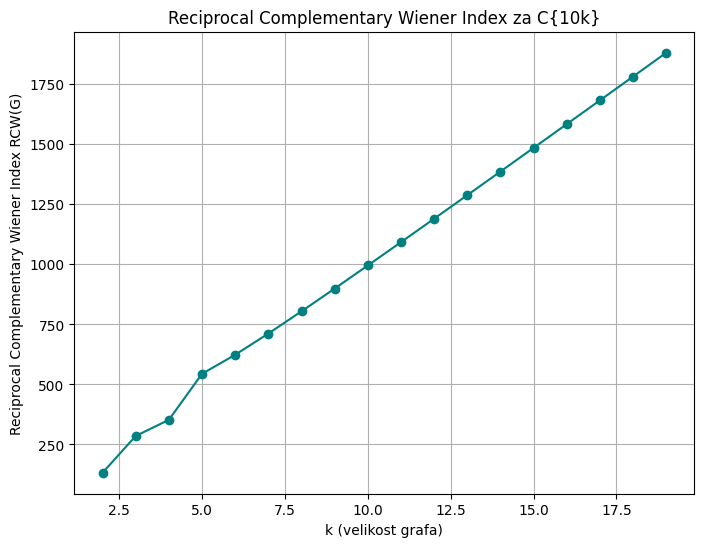

In [ ]:
def reciprocal_complementary_wiener_index(G):
    diameter = nx.diameter(G)  # Premer grafa (največja razdalja med vozlišči)
    distances = dict(nx.all_pairs_shortest_path_length(G))  # Vse razdalje med pari vozlišč

    index = sum(
        1 / (diameter + 1 - distances[u][v])
        for u in G.nodes()
        for v in G.nodes()
        if u != v
    )
    return index

# Analiza indeksa za različne k
k_values = range(2, 20)
rcw_indices = []

for k in k_values:
    molecule = ntf(k)
    G = molecule.G
    rcw_index = reciprocal_complementary_wiener_index(G)
    rcw_indices.append(rcw_index)

# Vizualizacija rezultata
plt.figure(figsize=(8, 6))
plt.plot(k_values, rcw_indices, 'o-', color='teal')
plt.xlabel('k (velikost grafa)')
plt.ylabel('Reciprocal Complementary Wiener Index RCW(G)')
plt.title('Reciprocal Complementary Wiener Index za C{10k}')
plt.grid(True)
plt.show()

Rast je (z razliko pri majhnih k) linearna in stabilna. Razdalje so pri majhnih k bolj skoncentrirane in graf preide iz kompaktne strukture v bolj raztegnjeno strukturo. 

6. Sum-Balaban index

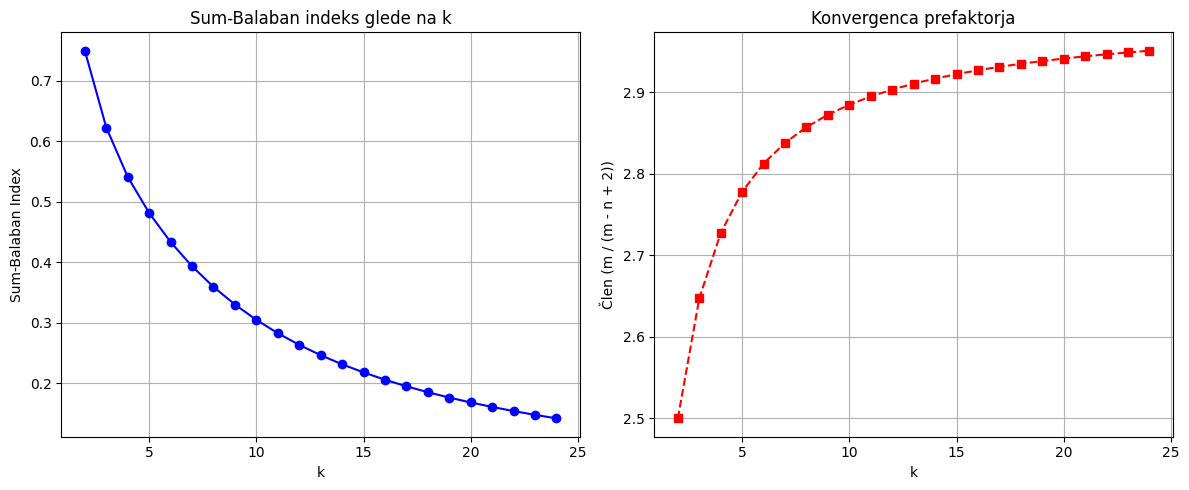

Člen pri k=24 je približno: 2.9508


In [ ]:
# Najprej definirajmo funkcijo za Sum-Balaban indeks
def sum_balaban_index(G):
    n = G.number_of_nodes()
    m = G.number_of_edges()

    # Izračunaj w(u) za vsako vozlišče
    distances = dict(nx.all_pairs_shortest_path_length(G))
    w = {u: sum(distances[u].values()) for u in G.nodes}

    # Glavni izraz indeksa
    sum_term = sum(1 / (w[u] + w[v]) for u, v in G.edges)
    sb_index = (m / (m - n + 2)) * sum_term

    return sb_index, m / (m - n + 2)


# Sedaj izvedimo test in analizo konvergence:
k_values = list(range(2, 25))  # k od 2 do 24 
sb_indices = []
prefactors = []

for k in k_values:
    molecule = ntf(k)
    G = molecule.G

    sb_index, prefactor = sum_balaban_index(G)
    sb_indices.append(sb_index)
    prefactors.append(prefactor)

# Vizualizacija rezultatov
plt.figure(figsize=(12, 5))

# Sum-Balaban indeks
plt.subplot(1, 2, 1)
plt.plot(k_values, sb_indices, marker='o', linestyle='-', color='blue')
plt.xlabel('k')
plt.ylabel('Sum-Balaban Index')
plt.title('Sum-Balaban indeks glede na k')
plt.grid(True)

# člen pred vsoto
plt.subplot(1, 2, 2)
plt.plot(k_values, prefactors, marker='s', linestyle='--', color='red')
plt.xlabel('k')
plt.ylabel('Člen (m / (m - n + 2))')
plt.title('Konvergenca prefaktorja')
plt.grid(True)

plt.tight_layout()
plt.show()

# Preverimo kam konvergira prefaktor:
lim_prefactor = prefactors[-1]
print(f"Člen pri k={k_values[-1]} je približno: {lim_prefactor:.4f}")

Opazimo, da člen pred vsoto konvergira k 3 (stabilno razmerje povezav in vozlišč). Indeks nam pove, kako so vozlišča povezana znotraj grafa. Nižja vrednost implicira kompakten graf in enakomerno, simetrično strukturo.

7. Generalized Wiener index

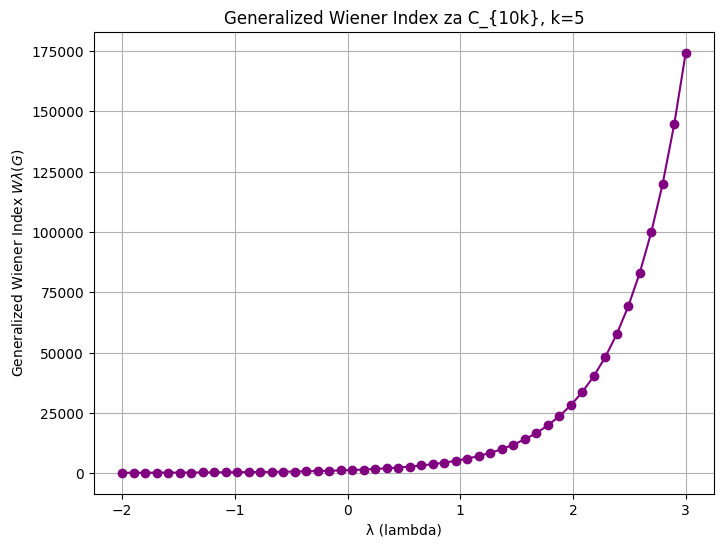

In [26]:
# Funkcija za izračun W_lambda(G)
def generalized_wiener_index(G, lambd):
    distances = dict(nx.all_pairs_shortest_path_length(G))
    wiener_sum = 0

    # seštevek čez vse neurejene pare (u,v)
    nodes = list(G.nodes())
    for i, u in enumerate(nodes):
        for v in nodes[i+1:]:  # vsak par samo enkrat
            d = distances[u][v]
            if d > 0:
                wiener_sum += d ** lambd

    return wiener_sum

# Preverjanje indeksa za različne lambde in fiksen k
k = 5
molecule = ntf(k)
G = molecule.G

# Izberemo lambde
lambdas = np.linspace(-2, 3, 50)
wiener_indices = []

for lambd in lambdas:
    wiener_index = generalized_wiener_index(G, lambd)
    wiener_indices.append(wiener_index)

# Grafično prikazovanje vedenja indeksa glede na lambda
plt.figure(figsize=(8, 6))
plt.plot(lambdas, wiener_indices, 'o-', color='purple')
plt.xlabel('λ (lambda)')
plt.ylabel('Generalized Wiener Index $W{λ}(G)$')
plt.title(f'Generalized Wiener Index za C_{{10k}}, k={k}')
plt.grid(True)
plt.show()

Pri lambda = -1, dobimo Hararyev indeks. 

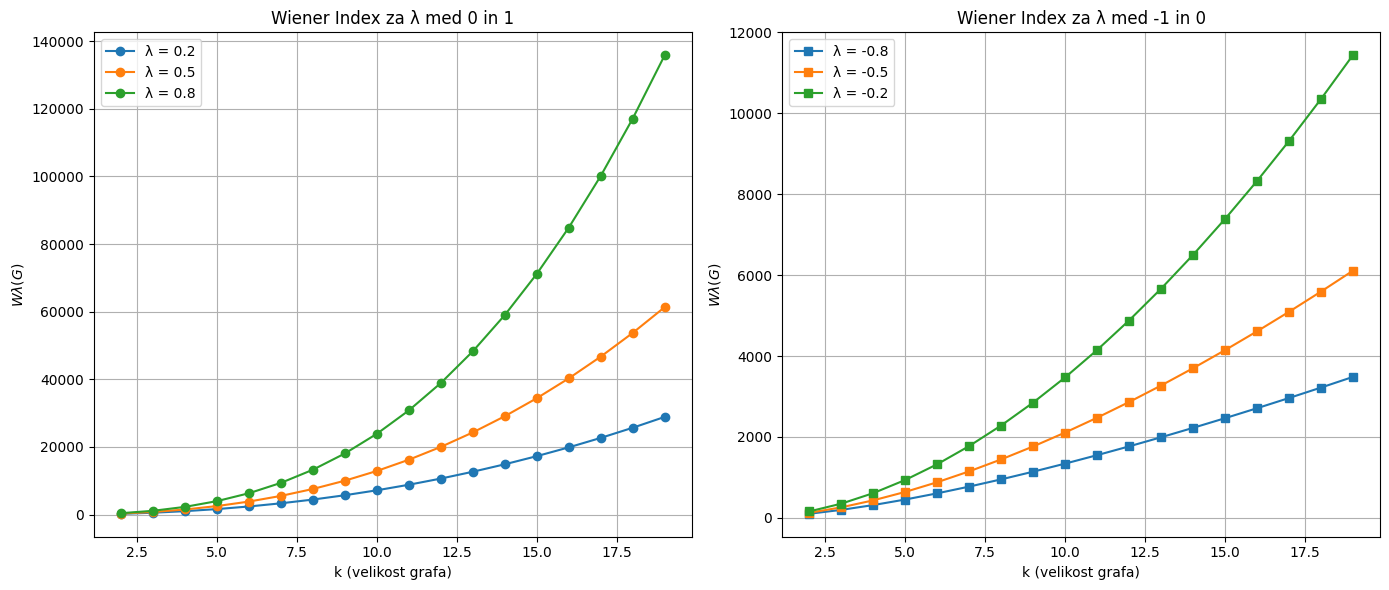

In [ ]:
# Funkcija za izračun posplošenega Wiener indeksa
def generalized_wiener_index(G, lambd):
    distances = dict(nx.all_pairs_shortest_path_length(G))
    wiener_sum = 0

    nodes = list(G.nodes())
    for i, u in enumerate(nodes):
        for v in nodes[i+1:]:
            d = distances[u][v]
            if d > 0:
                wiener_sum += d ** lambd

    return wiener_sum

# Analiza za omejene lambde in naraščajoč k
k_values = range(2, 20)
lambdas_positive = [0.2, 0.5, 0.8]
lambdas_negative = [-0.8, -0.5, -0.2]

# Pripravi graf
plt.figure(figsize=(14, 6))

# Lambda med 0 in 1
plt.subplot(1, 2, 1)
for lambd in lambdas_positive:
    indices = []
    for k in k_values:
        molecule = ntf(k)
        G = molecule.G
        indices.append(generalized_wiener_index(G, lambd))
    plt.plot(k_values, indices, '-o', label=f'λ = {lambd}')

plt.title('Wiener Index za λ med 0 in 1')
plt.xlabel('k (velikost grafa)')
plt.ylabel('$Wλ(G)$')
plt.grid(True)
plt.legend()

# Lambda med -1 in 0
plt.subplot(1, 2, 2)
for lambd in lambdas_negative:
    indices = []
    for k in k_values:
        molecule = ntf(k)
        G = molecule.G
        indices.append(generalized_wiener_index(G, lambd))
    plt.plot(k_values, indices, '-s', label=f'λ = {lambd}')

plt.title('Wiener Index za λ med -1 in 0')
plt.xlabel('k (velikost grafa)')
plt.ylabel('$Wλ(G)$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Opazimo da ne glede na lambdo indeks monotono raste, kar je smiselno, saj se število vozlišč povečuje. \
Pri lambdah blizu 1 je rast ekstremno hitra (skoraj eksponentna), pri negativnih je rast bistveno počasnejša, a še vedno monotono narašča.

A.2

1. Eccentric connectivity index

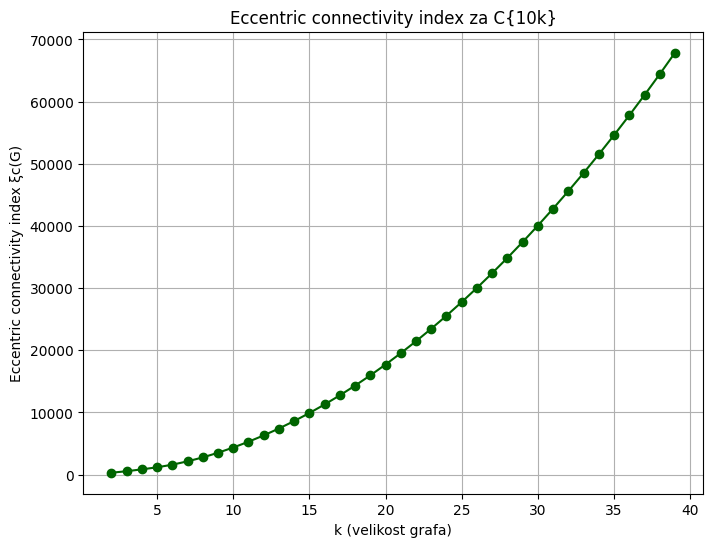

In [28]:
# Funkcija za eccentric connectivity index
def eccentric_connectivity_index(G):
    eccentricities = nx.eccentricity(G)  # ekscentričnosti vozlišč
    degrees = dict(G.degree())  # stopnje vozlišč

    index = sum(degrees[v] * eccentricities[v] for v in G.nodes())
    return index

# Analiza indeksa za različne k
k_values = range(2, 40)
ecc_indices = []

for k in k_values:
    molecule = ntf(k)
    G = molecule.G
    eci = eccentric_connectivity_index(G)
    ecc_indices.append(eci)

# Vizualizacija rezultata
plt.figure(figsize=(8, 6))
plt.plot(k_values, ecc_indices, 'o-', color='darkgreen')
plt.xlabel('k (velikost grafa)')
plt.ylabel('Eccentric connectivity index ξc(G)')
plt.title('Eccentric connectivity index za C{10k}')
plt.grid(True)
plt.show()

Ta indeks je odvisen od stopnje vozlišč in od ekscentričnosti vozlišč. Naš graf je 3-regularen, zato je v našem primeru indeks odvisen zgolj od ekscentričnosti. Tako rast indeksa odraža rast ekscentričnosti. Graf nam jasno kaže, da se z večanjem vozlišč graf razteguje v dolžino.

2. Eccentric adjacency index

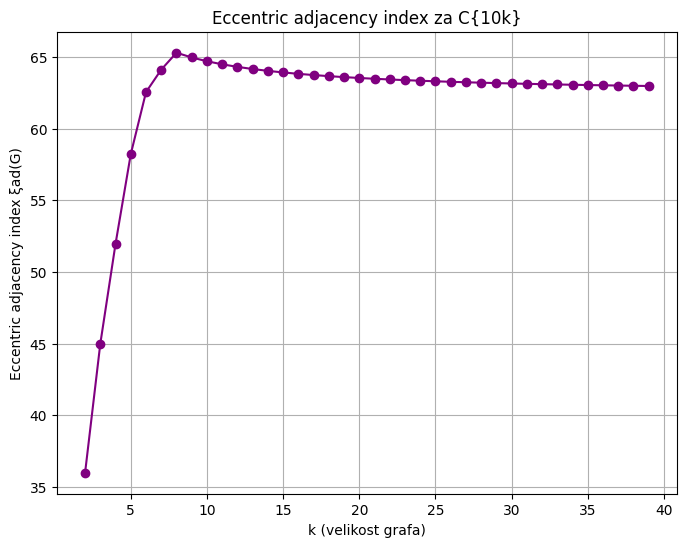

In [29]:
# Funkcija za eccentric adjacency index
def eccentric_adjacency_index_div(G):
    eccentricities = nx.eccentricity(G)
    degrees = dict(G.degree())

    index = 0
    for v in G.nodes():
        sum_deg_neighbors = sum(degrees[neighbor] for neighbor in G.neighbors(v))
        index += sum_deg_neighbors / eccentricities[v]

    return index

# Analiza indeksa za različne k
k_values = range(2, 40)
ecc_adj_div_indices = []

for k in k_values:
    molecule = ntf(k)
    G = molecule.G
    eai_div = eccentric_adjacency_index_div(G)
    ecc_adj_div_indices.append(eai_div)

# Vizualizacija rezultata
plt.figure(figsize=(8, 6))
plt.plot(k_values, ecc_adj_div_indices, 'o-', color='purple')
plt.xlabel('k (velikost grafa)')
plt.ylabel('Eccentric adjacency index ξad(G)')
plt.title('Eccentric adjacency index za C{10k}')
plt.grid(True)
plt.show()

Ta indeks je odvisen od ekstentričnosti posameznega vozlišča in vsote stopenj njegovih sosedov. \
- Ko je k majhen, indeks hitro narašča. Ko dodamo samo nekaj orbital, se poveča vsota stopenj sosedov, ampak hkrati ekscentričnost še ni močno narasla, kar poveča indeks.
- Graf hitro doseže maksimum in nato se približuje določeni vrednosti. Ko k narašča, začnejo tudi ekscentričnosti vozlišč hitro naraščati, kar zmanjšuje indeks. zaradi regularnosti našega grafa pa se ta dva učinka medsebojno izravnata.

In [ ]:
# Funkcija za eccentric adjacency indeks 
def eccentric_adjacency_index_div(G):
    eccentricities = nx.eccentricity(G)
    degrees = dict(G.degree())

    return sum(sum(degrees[neighbor] for neighbor in G.neighbors(v)) / eccentricities[v] for v in G.nodes())


# Preverjanje limite za velike vrednosti k
large_k_values = [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 500]
indices = []

for k in large_k_values:
    molecule = ntf(k)
    G = molecule.G
    idx_value = eccentric_adjacency_index_div(G)
    indices.append(idx_value)
    print(f"k={k}, eccentric adjacency indeks: {idx_value:.4f}")



k=50, eccentric adjacency indeks: 62.8355
k=60, eccentric adjacency indeks: 62.7598
k=70, eccentric adjacency indeks: 62.7058
k=80, eccentric adjacency indeks: 62.6654
k=90, eccentric adjacency indeks: 62.6339
k=100, eccentric adjacency indeks: 62.6088
k=110, eccentric adjacency indeks: 62.5883
k=120, eccentric adjacency indeks: 62.5711
k=130, eccentric adjacency indeks: 62.5567
k=140, eccentric adjacency indeks: 62.5442
k=150, eccentric adjacency indeks: 62.5335
k=500, eccentric adjacency indeks: 62.4283


Opazimo, da (po doseženem maksimumu) konvergira proti 62.

3. First eccentric connectivity index

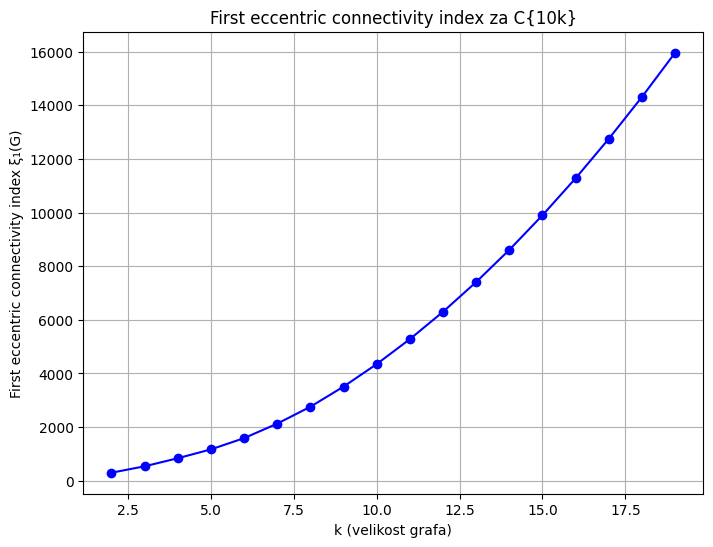

In [ ]:
# Funkcija za first eccentric connectivity index
def first_eccentric_connectivity_index(G):
    eccentricities = nx.eccentricity(G)

    index = sum(eccentricities[u] + eccentricities[v] for u, v in G.edges())
    return index

# Analiza indeksa za različne k
k_values = range(2, 20)
first_ecc_indices = []

for k in k_values:
    molecule = ntf(k)
    G = molecule.G
    fec_index = first_eccentric_connectivity_index(G)
    first_ecc_indices.append(fec_index)

# Vizualizacija rezultata
plt.figure(figsize=(8, 6))
plt.plot(k_values, first_ecc_indices, 'o-', color='blue')
plt.xlabel('k (velikost grafa)')
plt.ylabel('First eccentric connectivity index ξ₁(G)')
plt.title('First eccentric connectivity index za C{10k}')
plt.grid(True)
plt.show()

Indeks je odvisen od ekscentričnosti in števila povezav in narašča približno kvadratno. 

4. Second eccentric connectivity index

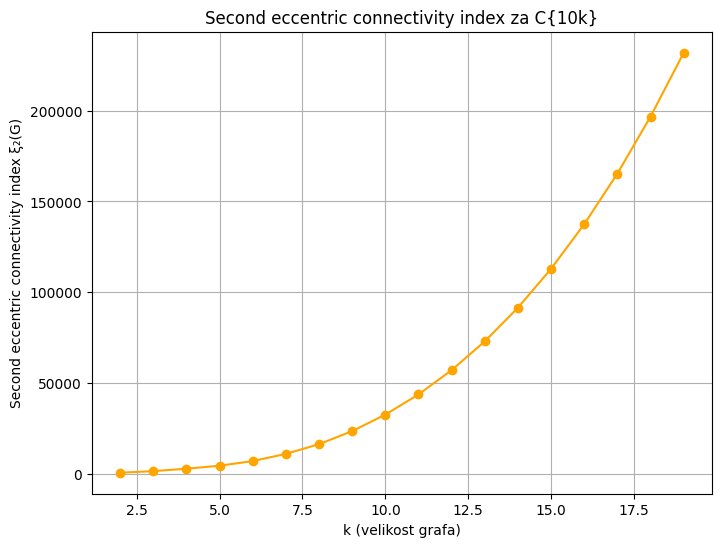

In [ ]:
# Funkcija za second eccentric connectivity index
def second_eccentric_connectivity_index(G):
    eccentricities = nx.eccentricity(G)

    index = sum(eccentricities[u] * eccentricities[v] for u, v in G.edges())
    return index

# Analiza indeksa za različne k
k_values = range(2, 20)
second_ecc_indices = []

for k in k_values:
    molecule = ntf(k)
    G = molecule.G
    sec_index = second_eccentric_connectivity_index(G)
    second_ecc_indices.append(sec_index)

# Vizualizacija rezultata
plt.figure(figsize=(8, 6))
plt.plot(k_values, second_ecc_indices, 'o-', color='orange')
plt.xlabel('k (velikost grafa)')
plt.ylabel('Second eccentric connectivity index ξ₂(G)')
plt.title('Second eccentric connectivity index za C{10k}')
plt.grid(True)
plt.show()

Indeks je odvisen od ekscentričnosti in števila povezav, enako kot pri prejšnjem primeru. Indeks uporablja produkt eksentričnosti, zato je pričakovana hitrejša rast kot prej, kar tudi graf potrjuje.